In [1]:
!pip install etherscan-python

Note: you may need to restart the kernel to use updated packages.


# SushiSwap

In [201]:
import time
import pandas as pd
import requests
import shared
shared.init()
import json
from web3 import Web3, HTTPProvider
from hexbytes import HexBytes
from web3.datastructures import AttributeDict
from Utils.eth_utils import  obtain_hash_event

def connect_to_web3():
    """
    Connect to Web3 server.
    Args:
    Returns:
      res: Boolean indicating that connection was succeed or not.
      web3: Web3 Object
    """
    web3 = Web3(HTTPProvider('https://polygon-mainnet.infura.io/v3/d6243bb783b44485ad6636b6c3411377'))
    res = web3.isConnected()
    return res, web3

# from_block = 22757547
from_block = 11000000
response = [0] * 1000
block_number = []
_, web3 = connect_to_web3()
contract = web3.eth.contract(shared.SUSHISWAP_FACTORY, abi=shared.SUSHI_ABI_FACTORY)

#topic = "0x783cca1c0412dd0d695e784568c96da2e9c22ff989357a2e8b1d9b2b4e6b7118"
topic = obtain_hash_event('PairCreated(address,address,address,uint256)')


tokens0, tokens1, pairs, block_numbers, timestamps = [], [], [], [], []
cont = 1000
while len(response) >= 1000:
    try:
        print("Pools trobades", cont)
        cont += 1000
        apikey = "VSMZNRH614X31FP6FAPFQXPKTT5UFETVNC"
        endpoint = "https://api.polygonscan.com/api?module=logs" \
                   "&action=getLogs" \
                   f"&fromBlock={from_block}" \
                   f"&toBlock={shared.BLOCKSTUDY}" \
                   f"&address={shared.SUSHISWAP_FACTORY}" \
                   f"&topic0={topic}" \
                   f"&apikey={apikey}"

        response = json.loads(requests.get(endpoint).text)['result']

        # print(response)
        receipts = []
        for event in response:
            receipts.append(AttributeDict({
                'blockNumber': int(event['blockNumber'], 16),
                'contractAddress': event['address'],
                'topics': [HexBytes(topic) for topic in event['topics']],
                'transactionHash': HexBytes(event['transactionHash']),
                'data': event['data'],
                'logIndex': 0,
                'transactionIndex': event['transactionIndex'],
                'address': event['address'],
                'blockHash': HexBytes(event['transactionHash'])
            }))
        log_dict = {'logs': receipts}
        # print(log_dict)
        decoded_logs = contract.events.PairCreated().processReceipt(log_dict)
        # print(decoded_logs)
        for k, log in enumerate(decoded_logs):
            block_numbers.append(log['blockNumber'])
            tokens0.append(log['args']["token0"])
            tokens1.append(log['args']['token1'])
            pairs.append(log['args']['pair'])
            #fees.append(log['args']['fee'])
            timestamps.append(int(response[k]['timeStamp'], 16))
        from_block = int(response[-1]['blockNumber'], 16) + 1

    except Exception as err:
        print("error", err)
        time.sleep(2)

pd.DataFrame({'pair': pairs, 'token0': tokens0, 'token1': tokens1, 'block_number': block_numbers, 'timestamp': timestamps}).to_csv(
    "./data/sushiswap/polygonscan_pools.csv", index=False)

Pools trobades 1000
Pools trobades 2000
Pools trobades 3000
Pools trobades 4000
Pools trobades 5000
Pools trobades 6000


In [ ]:
import time
import pandas as pd
import requests
import shared
shared.init()
import json
from web3 import Web3, HTTPProvider
from hexbytes import HexBytes
from web3.datastructures import AttributeDict
from Utils.eth_utils import  obtain_hash_event

def connect_to_web3():
    """
    Connect to Web3 server.
    Args:
    Returns:
      res: Boolean indicating that connection was succeed or not.
      web3: Web3 Object
    """
    web3 = Web3(HTTPProvider('https://mainnet.infura.io/v3/8655d8dde140419399ec01dda4594c0b'))
    res = web3.isConnected()
    return res, web3

# from_block = 22757547
from_block = 11000000
response = [0] * 1000
block_number = []
_, web3 = connect_to_web3()
contract = web3.eth.contract(shared.SUSHISWAP_FACTORY, abi=shared.SUSHI_ABI_FACTORY)

topic = "0x0d3648bd0f6ba80134a33ba9275ac585d9d315f0ad8355cddefde31afa28d0e9"
#topic = obtain_hash_event('PairCreated(address,address,address,uint256)')


tokens0, tokens1, pairs, block_numbers, timestamps = [], [], [], [], []
cont = 1000
while len(response) >= 1000:
    #try:
        print("Pools trobades", cont)
        cont += 1000
        apikey = "RBVZ2HBBN8RN4NDEPJCFH3G7IXFAXG1JM8"
        endpoint = "https://api.etherscan.io/api?module=logs" \
                   "&action=getLogs" \
                   f"&fromBlock={from_block}" \
                   f"&toBlock={shared.BLOCKSTUDY}" \
                   f"&address=0xC0AEe478e3658e2610c5F7A4A2E1777cE9e4f2Ac" \
                   f"&topic0={topic}" \
                   f"&apikey={apikey}"
        print(endpoint)
        response = json.loads(requests.get(endpoint).text)['result']
        #print(response)

        receipts = []
        for event in response:
            receipts.append(AttributeDict({
                'blockNumber': int(event['blockNumber'], 16),
                'contractAddress': event['address'],
                'topics': [HexBytes(topic) for topic in event['topics']],
                'transactionHash': HexBytes(event['transactionHash']),
                'data': event['data'],
                'logIndex': 0,
                'transactionIndex': event['transactionIndex'],
                'address': event['address'],
                'blockHash': HexBytes(event['transactionHash'])
            }))
        log_dict = {'logs': receipts}
        # print(log_dict)
        decoded_logs = contract.events.PairCreated().processReceipt(log_dict)
        # print(decoded_logs)
        for k, log in enumerate(decoded_logs):
            block_numbers.append(log['blockNumber'])
            tokens0.append(log['args']["token0"])
            tokens1.append(log['args']['token1'])
            pairs.append(log['args']['pair'])
            #fees.append(log['args']['fee'])
            timestamps.append(int(response[k]['timeStamp'], 16))
        from_block = int(response[-1]['blockNumber'], 16) + 1

    #except Exception as err:
        #print("error", err)
        #time.sleep(2)

pd.DataFrame({'pair': pairs, 'token0': tokens0, 'token1': tokens1, 'block_number': block_numbers, 'timestamp': timestamps}).to_csv(
    "./data/sushiswap/etherscan_pools.csv", index=False)

# Uniswap V2

In [192]:
import time
import pandas as pd
import requests
import shared
shared.init()
import json
from web3 import Web3, HTTPProvider
from hexbytes import HexBytes
from web3.datastructures import AttributeDict
from Utils.eth_utils import  obtain_hash_event

def connect_to_web3():
    """
    Connect to Web3 server.
    Args:
    Returns:
      res: Boolean indicating that connection was succeed or not.
      web3: Web3 Object
    """
    web3 = Web3(HTTPProvider('https://polygon-mainnet.infura.io/v3/d6243bb783b44485ad6636b6c3411377'))
    res = web3.isConnected()
    return res, web3

#from_block = 22757547
from_block = 11000000
response = [0] * 1000
block_number = []
_, web3 = connect_to_web3()
contract = web3.eth.contract(shared.UNISWAP_V2_FACTORY, abi="""[{"inputs":[{"internalType":"address","name":"_feeToSetter","type":"address"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"token0","type":"address"},{"indexed":true,"internalType":"address","name":"token1","type":"address"},{"indexed":false,"internalType":"address","name":"pair","type":"address"},{"indexed":false,"internalType":"uint256","name":"","type":"uint256"}],"name":"PairCreated","type":"event"},{"constant":true,"inputs":[{"internalType":"uint256","name":"","type":"uint256"}],"name":"allPairs","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"allPairsLength","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"tokenA","type":"address"},{"internalType":"address","name":"tokenB","type":"address"}],"name":"createPair","outputs":[{"internalType":"address","name":"pair","type":"address"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"feeTo","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"feeToSetter","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"internalType":"address","name":"","type":"address"},{"internalType":"address","name":"","type":"address"}],"name":"getPair","outputs":[{"internalType":"address","name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"_feeTo","type":"address"}],"name":"setFeeTo","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"internalType":"address","name":"_feeToSetter","type":"address"}],"name":"setFeeToSetter","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"}]""")

topic = obtain_hash_event('PairCreated(address,address,address,uint256)')
# topic = obtain_hash_event('PoolCreated(address,address,uint24,int24,address')


tokens0, tokens1, pairs, block_numbers, timestamps = [], [], [], [], []
cont = 1000
while len(response) >= 1000:
    try:
        print("Pools trobades", cont)
        cont += 1000
        apikey = "P6Z71M2VBHAHHBFMM91YT5YWENGJYTJT81"
        endpoint = "https://api.polygonscan.com/api?module=logs" \
                   "&action=getLogs" \
                   f"&fromBlock={from_block}" \
                   f"&toBlock={shared.BLOCKSTUDY}" \
                   f"&address={shared.SUSHISWAP_FACTORY}" \
                   f"&topic0={topic}" \
                   f"&apikey={apikey}"

        response = json.loads(requests.get(endpoint).text)['result']

        # print(response)
        receipts = []
        for event in response:
            receipts.append(AttributeDict({
                'blockNumber': int(event['blockNumber'], 16),
                'contractAddress': event['address'],
                'topics': [HexBytes(topic) for topic in event['topics']],
                'transactionHash': HexBytes(event['transactionHash']),
                'data': event['data'],
                'logIndex': 0,
                'transactionIndex': event['transactionIndex'],
                'address': event['address'],
                'blockHash': HexBytes(event['transactionHash'])
            }))
        log_dict = {'logs': receipts}
        # print(log_dict)
        decoded_logs = contract.events.PairCreated().processReceipt(log_dict)
        # print(decoded_logs)
        for k, log in enumerate(decoded_logs):
            block_numbers.append(log['blockNumber'])
            tokens0.append(log['args']["token0"])
            tokens1.append(log['args']['token1'])
            pairs.append(log['args']['pair'])
            #fees.append(log['args']['fee'])
            timestamps.append(int(response[k]['timeStamp'], 16))
        from_block = int(response[-1]['blockNumber'], 16) + 1

    except Exception as err:
        print("error", err)
        time.sleep(2)

pd.DataFrame({'pair': pairs, 'token0': tokens0, 'token1': tokens1, 'block_number': block_numbers, 'timestamp': timestamps}).to_csv(
    "./data/uniswap_v2/polygonscan_pools.csv", index=False)

Pools trobades 1000
Pools trobades 2000
Pools trobades 3000
Pools trobades 4000
Pools trobades 5000
Pools trobades 6000


In [ ]:
import time
import pandas as pd
import requests
import shared
shared.init()
import json
from web3 import Web3, HTTPProvider
from hexbytes import HexBytes
from web3.datastructures import AttributeDict
from Utils.eth_utils import  obtain_hash_event

def connect_to_web3():
    """
    Connect to Web3 server.
    Args:
    Returns:
      res: Boolean indicating that connection was succeed or not.
      web3: Web3 Object
    """
    web3 = Web3(HTTPProvider('https://mainnet.infura.io/v3/8655d8dde140419399ec01dda4594c0b'))
    res = web3.isConnected()
    return res, web3

# from_block = 22757547
from_block = 11000000
response = [0] * 1000
block_number = []
_, web3 = connect_to_web3()
contract = web3.eth.contract("0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f", abi=shared.SUSHI_ABI_FACTORY)

topic = "0x0d3648bd0f6ba80134a33ba9275ac585d9d315f0ad8355cddefde31afa28d0e9"
#topic = obtain_hash_event('PairCreated(address,address,address,uint256)')


tokens0, tokens1, pairs, block_numbers, timestamps = [], [], [], [], []
cont = 1000
while len(response) >= 1000:
    #try:
        print("Pools trobades", cont)
        cont += 1000
        apikey = "RBVZ2HBBN8RN4NDEPJCFH3G7IXFAXG1JM8"
        endpoint = "https://api.etherscan.io/api?module=logs" \
                   "&action=getLogs" \
                   f"&fromBlock={from_block}" \
                   f"&toBlock={shared.BLOCKSTUDY}" \
                   f"&address=0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f" \
                   f"&topic0={topic}" \
                   f"&apikey={apikey}"
        print(endpoint)
        response = json.loads(requests.get(endpoint).text)['result']
        #print(response)

        receipts = []
        for event in response:
            receipts.append(AttributeDict({
                'blockNumber': int(event['blockNumber'], 16),
                'contractAddress': event['address'],
                'topics': [HexBytes(topic) for topic in event['topics']],
                'transactionHash': HexBytes(event['transactionHash']),
                'data': event['data'],
                'logIndex': 0,
                'transactionIndex': event['transactionIndex'],
                'address': event['address'],
                'blockHash': HexBytes(event['transactionHash'])
            }))
        log_dict = {'logs': receipts}
        # print(log_dict)
        decoded_logs = contract.events.PairCreated().processReceipt(log_dict)
        # print(decoded_logs)
        for k, log in enumerate(decoded_logs):
            block_numbers.append(log['blockNumber'])
            tokens0.append(log['args']["token0"])
            tokens1.append(log['args']['token1'])
            pairs.append(log['args']['pair'])
            #fees.append(log['args']['fee'])
            timestamps.append(int(response[k]['timeStamp'], 16))
        from_block = int(response[-1]['blockNumber'], 16) + 1

    #except Exception as err:
        #print("error", err)
        #time.sleep(2)

pd.DataFrame({'pair': pairs, 'token0': tokens0, 'token1': tokens1, 'block_number': block_numbers, 'timestamp': timestamps}).to_csv(
    "./data/uniswap_v2/etherscan_pools.csv", index=False)

# Uniswap V3

In [186]:
import time
import pandas as pd
import requests
import shared
shared.init()
import json
from web3 import Web3, HTTPProvider
from hexbytes import HexBytes
from web3.datastructures import AttributeDict
from Utils.eth_utils import  obtain_hash_event

def connect_to_web3():
    """
    Connect to Web3 server.
    Args:
    Returns:
      res: Boolean indicating that connection was succeed or not.
      web3: Web3 Object
    """
    web3 = Web3(HTTPProvider('https://mainnet.infura.io/v3/8655d8dde140419399ec01dda4594c0b'))
    res = web3.isConnected()
    return res, web3

# from_block = 22757547
from_block = 11000000
response = [0] * 1000
block_number = []
_, web3 = connect_to_web3()
contract = web3.eth.contract("0x1F98431c8aD98523631AE4a59f267346ea31F984", abi=shared.ABI_FACTORY)

topic = "0x783cca1c0412dd0d695e784568c96da2e9c22ff989357a2e8b1d9b2b4e6b7118"
#topic = obtain_hash_event('PoolCreated(address,address,address,uint256)')


tokens0, tokens1, pools, block_numbers, timestamps = [], [], [], [], []
cont = 1000
while len(response) >= 1000:
    #try:
        print("Pools trobades", cont)
        cont += 1000
        apikey = "RBVZ2HBBN8RN4NDEPJCFH3G7IXFAXG1JM8"
        endpoint = "https://api.etherscan.io/api?module=logs" \
                   "&action=getLogs" \
                   f"&fromBlock={from_block}" \
                   f"&toBlock={shared.BLOCKSTUDY}" \
                   f"&address=0x1F98431c8aD98523631AE4a59f267346ea31F984" \
                   f"&topic0={topic}" \
                   f"&apikey={apikey}"
        print(endpoint)
        response = json.loads(requests.get(endpoint).text)['result']
        #print(response)

        receipts = []
        for event in response:
            receipts.append(AttributeDict({
                'blockNumber': int(event['blockNumber'], 16),
                'contractAddress': event['address'],
                'topics': [HexBytes(topic) for topic in event['topics']],
                'transactionHash': HexBytes(event['transactionHash']),
                'data': event['data'],
                'logIndex': 0,
                'transactionIndex': event['transactionIndex'],
                'address': event['address'],
                'blockHash': HexBytes(event['transactionHash'])
            }))
        log_dict = {'logs': receipts}
        # print(log_dict)
        decoded_logs = contract.events.PoolCreated().processReceipt(log_dict)
        # print(decoded_logs)
        for k, log in enumerate(decoded_logs):
            block_numbers.append(log['blockNumber'])
            tokens0.append(log['args']["token0"])
            tokens1.append(log['args']['token1'])
            pools.append(log['args']['pool'])
            #fees.append(log['args']['fee'])
            timestamps.append(int(response[k]['timeStamp'], 16))
        from_block = int(response[-1]['blockNumber'], 16) + 1

    #except Exception as err:
        #print("error", err)
        #time.sleep(2)

pd.DataFrame({'pool': pools, 'token0': tokens0, 'token1': tokens1, 'block_number': block_numbers, 'timestamp': timestamps}).to_csv(
    "./data/uniswap_v3/etherscan_pools.csv", index=False)

Pools trobades 1000
https://api.etherscan.io/api?module=logs&action=getLogs&fromBlock=11000000&toBlock=27476347&address=0x1F98431c8aD98523631AE4a59f267346ea31F984&topic0=0x783cca1c0412dd0d695e784568c96da2e9c22ff989357a2e8b1d9b2b4e6b7118&apikey=RBVZ2HBBN8RN4NDEPJCFH3G7IXFAXG1JM8
Pools trobades 2000
https://api.etherscan.io/api?module=logs&action=getLogs&fromBlock=12445085&toBlock=27476347&address=0x1F98431c8aD98523631AE4a59f267346ea31F984&topic0=0x783cca1c0412dd0d695e784568c96da2e9c22ff989357a2e8b1d9b2b4e6b7118&apikey=RBVZ2HBBN8RN4NDEPJCFH3G7IXFAXG1JM8
Pools trobades 3000
https://api.etherscan.io/api?module=logs&action=getLogs&fromBlock=12597234&toBlock=27476347&address=0x1F98431c8aD98523631AE4a59f267346ea31F984&topic0=0x783cca1c0412dd0d695e784568c96da2e9c22ff989357a2e8b1d9b2b4e6b7118&apikey=RBVZ2HBBN8RN4NDEPJCFH3G7IXFAXG1JM8
Pools trobades 4000
https://api.etherscan.io/api?module=logs&action=getLogs&fromBlock=12765998&toBlock=27476347&address=0x1F98431c8aD98523631AE4a59f267346ea31F984&

In [193]:
import time
import pandas as pd
import requests
import shared
shared.init()
import json
from web3 import Web3, HTTPProvider
from hexbytes import HexBytes
from web3.datastructures import AttributeDict
from Utils.eth_utils import  obtain_hash_event

def connect_to_web3():
    """
    Connect to Web3 server.
    Args:
    Returns:
      res: Boolean indicating that connection was succeed or not.
      web3: Web3 Object
    """
    web3 = Web3(HTTPProvider('https://polygon-mainnet.infura.io/v3/d6243bb783b44485ad6636b6c3411377'))
    res = web3.isConnected()
    return res, web3

from_block = 11000000
response = [0] * 1000
block_number = []
_, web3 = connect_to_web3()
contract = web3.eth.contract(shared.UNISWAP_V3_FACTORY, abi=shared.ABI_FACTORY)

topic = "0x783cca1c0412dd0d695e784568c96da2e9c22ff989357a2e8b1d9b2b4e6b7118"
# topic = obtain_hash_event('PoolCreated(address,address,uint24,int24,address')


tokens0, tokens1, pools, block_numbers, timestamps, fees = [], [], [], [], [], []
cont = 1000
while len(response) >= 1000:
    try:
        print("Pools trobades", cont)
        cont += 1000
        apikey = "P6Z71M2VBHAHHBFMM91YT5YWENGJYTJT81"
        endpoint = "https://api.polygonscan.com/api?module=logs" \
                   "&action=getLogs" \
                   f"&fromBlock={from_block}" \
                   f"&toBlock={shared.BLOCKSTUDY}" \
                   f"&address={shared.UNISWAP_V3_FACTORY}" \
                   f"&topic0={topic}" \
                   f"&apikey={apikey}"

        response = json.loads(requests.get(endpoint).text)['result']
        receipts = []
        for event in response:
            receipts.append(AttributeDict({
                'blockNumber': int(event['blockNumber'], 16),
                'contractAddress': event['address'],
                'topics': [HexBytes(topic) for topic in event['topics']],
                'transactionHash': HexBytes(event['transactionHash']),
                'data': event['data'],
                'logIndex': 0,
                'transactionIndex': event['transactionIndex'],
                'address': event['address'],
                'blockHash': HexBytes(event['transactionHash'])
            }))
        log_dict = {'logs': receipts}
        decoded_logs = contract.events.PoolCreated().processReceipt(log_dict)
        for k, log in enumerate(decoded_logs):
            block_numbers.append(log['blockNumber'])
            tokens0.append(log['args']["token0"])
            tokens1.append(log['args']['token1'])
            pools.append(log['args']['pool'])
            fees.append(log['args']['fee'])
            timestamps.append(int(response[k]['timeStamp'], 16))
        from_block = int(response[-1]['blockNumber'], 16) + 1

    except Exception as err:
        print(err)
        time.sleep(2)

pd.DataFrame({'pair': pools, 'token0': tokens0, 'token1': tokens1, 'fees': fees, 'block_number': block_numbers, 'timestamp': timestamps}).to_csv(
    "./data/uniswap_v3/polygonscan_pools.csv", index=False)

Pools trobades 1000
Pools trobades 2000
Pools trobades 3000


In [176]:
polygon.timestamp.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0      2021-02-26 04:16:47
1      2021-03-04 06:11:15
2      2021-03-04 07:48:59
3      2021-03-04 07:50:31
4      2021-03-04 08:20:13
               ...        
5777   2022-04-23 06:30:14
5778   2022-04-23 06:53:10
5779   2022-04-23 07:04:42
5780   2022-04-23 07:10:18
5781   2022-04-23 07:19:40
Name: timestamp, Length: 5782, dtype: datetime64[ns]>

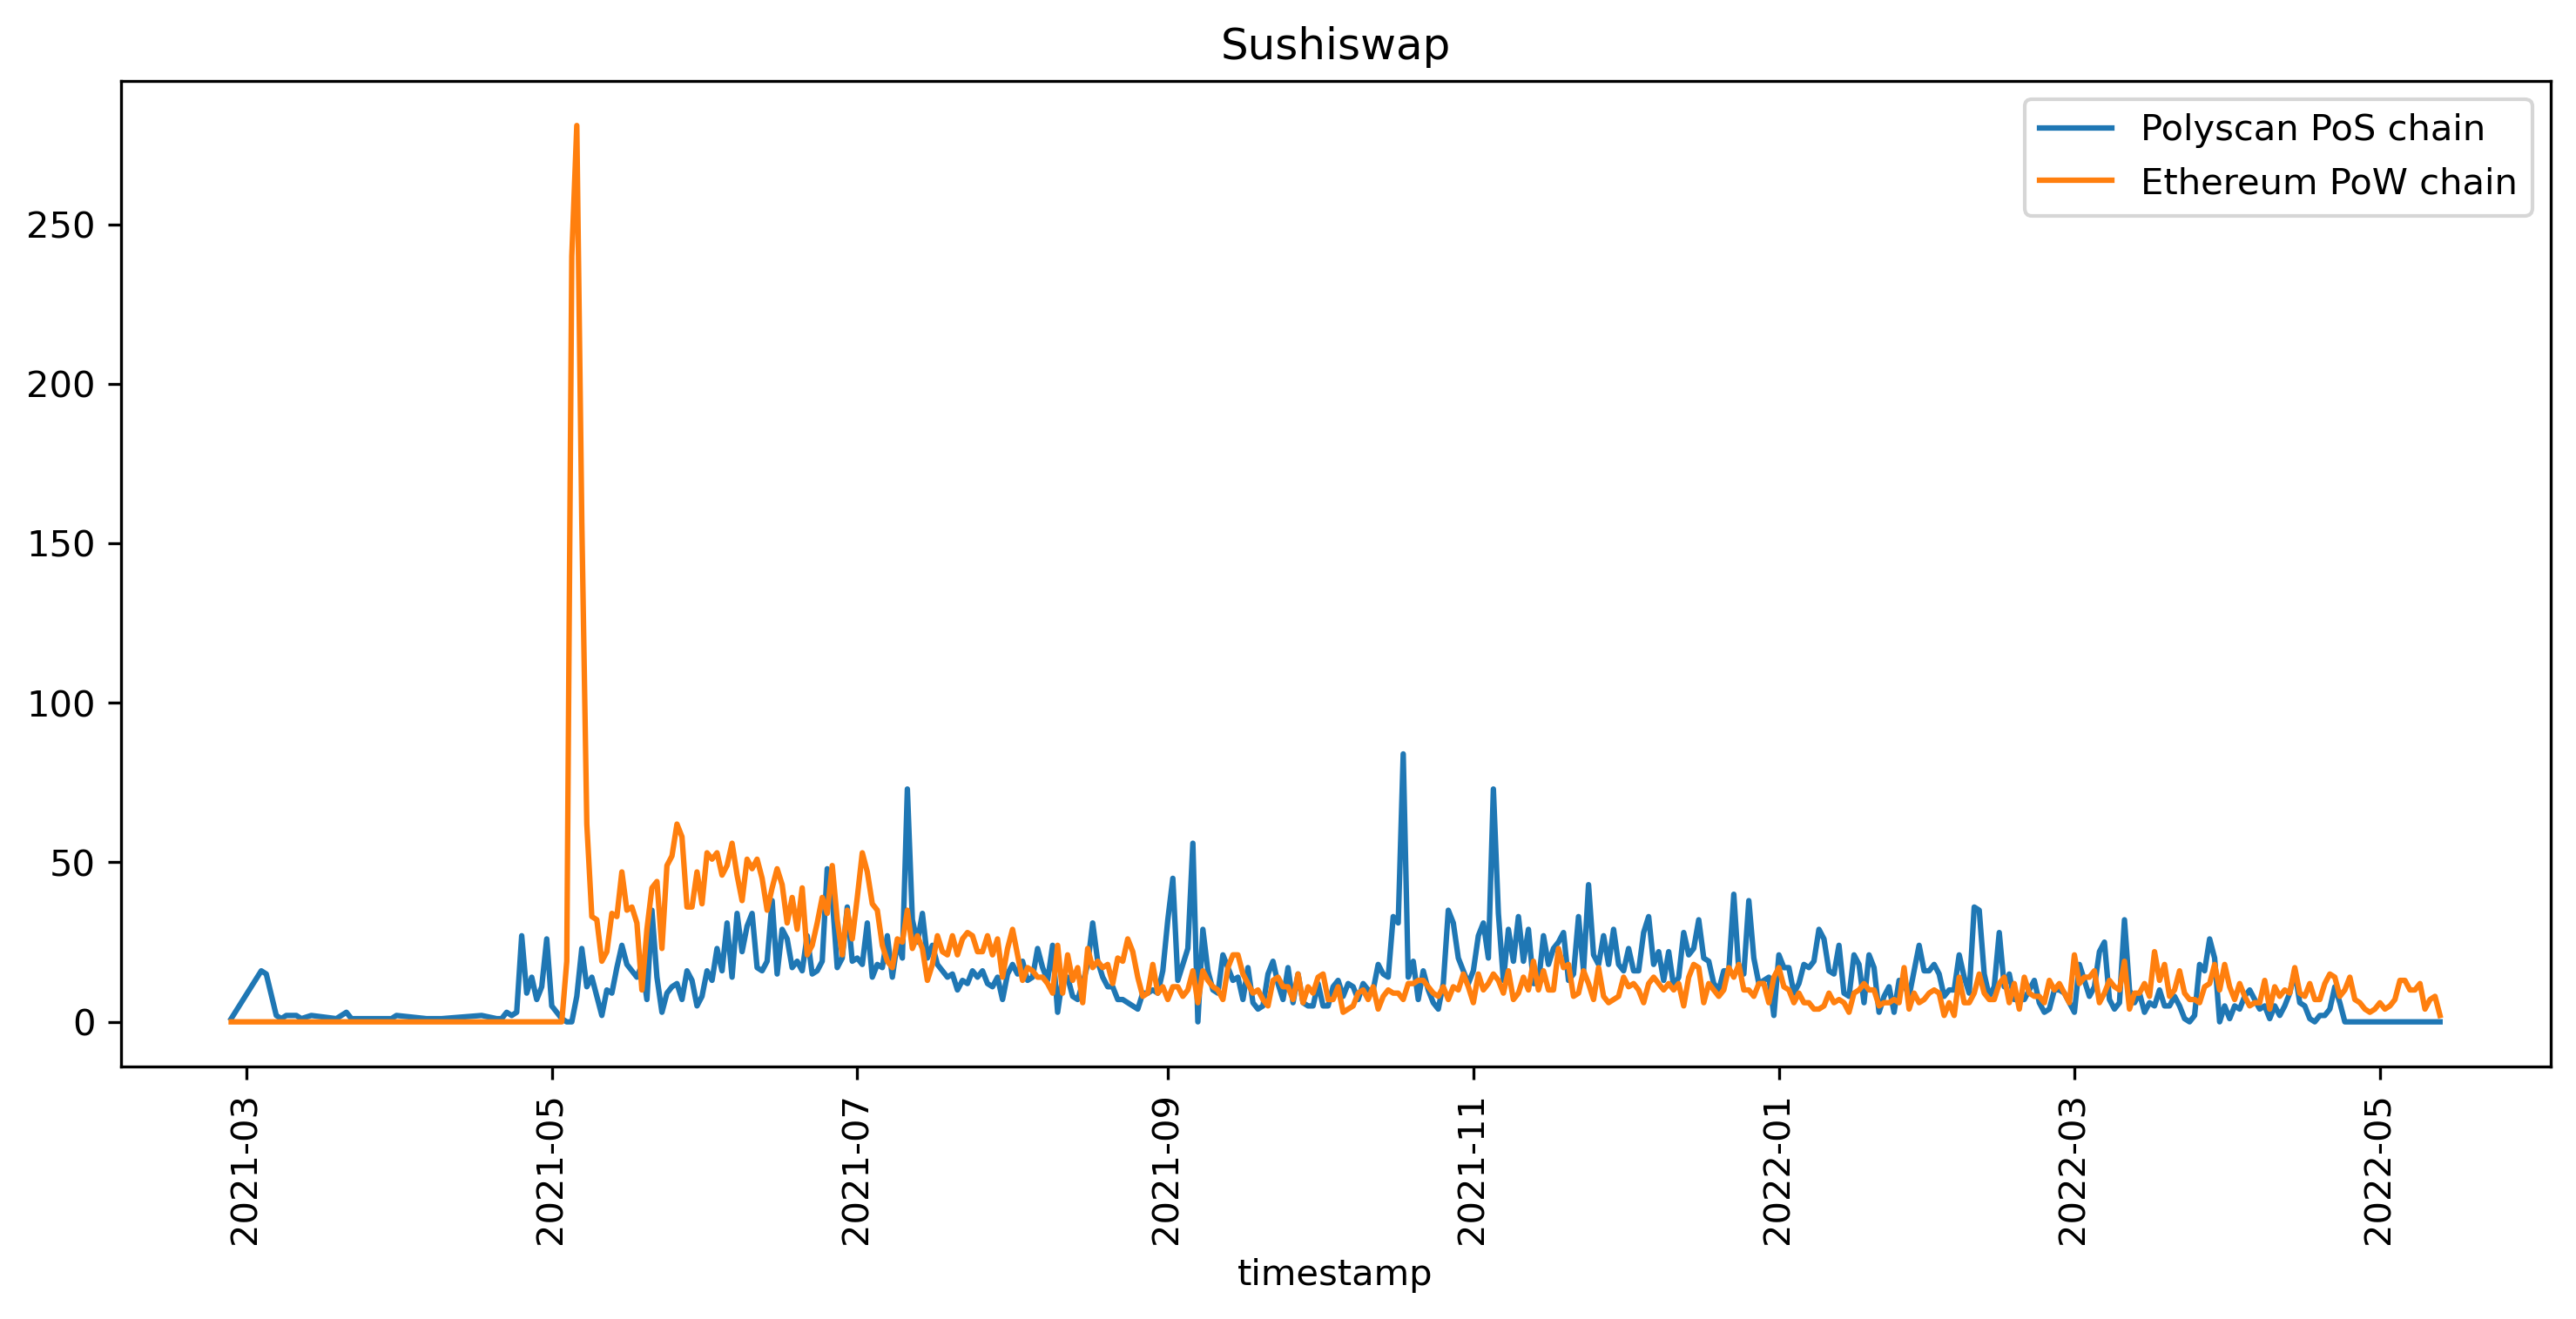

In [198]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

ether= pd.read_csv("data/sushiswap/etherscan_pools.csv")
polygon = pd.read_csv("data/sushiswap/polygonscan_pools.csv")

ether['timestamp']=pd.to_datetime(ether['timestamp'],unit='s')
polygon['timestamp']=pd.to_datetime(polygon['timestamp'],unit='s')

df = pd.concat([
    polygon['pair'].groupby(polygon['timestamp'].dt.date).count(),
    ether['pool'].groupby(ether['timestamp'].dt.date).count()], axis=1).fillna(0)
df.columns = ["Polyscan PoS chain","Ethereum PoW chain"]
df.plot(rot=90, figsize = (12, 5), title = "Sushiswap").figure.savefig("Sushiswap")

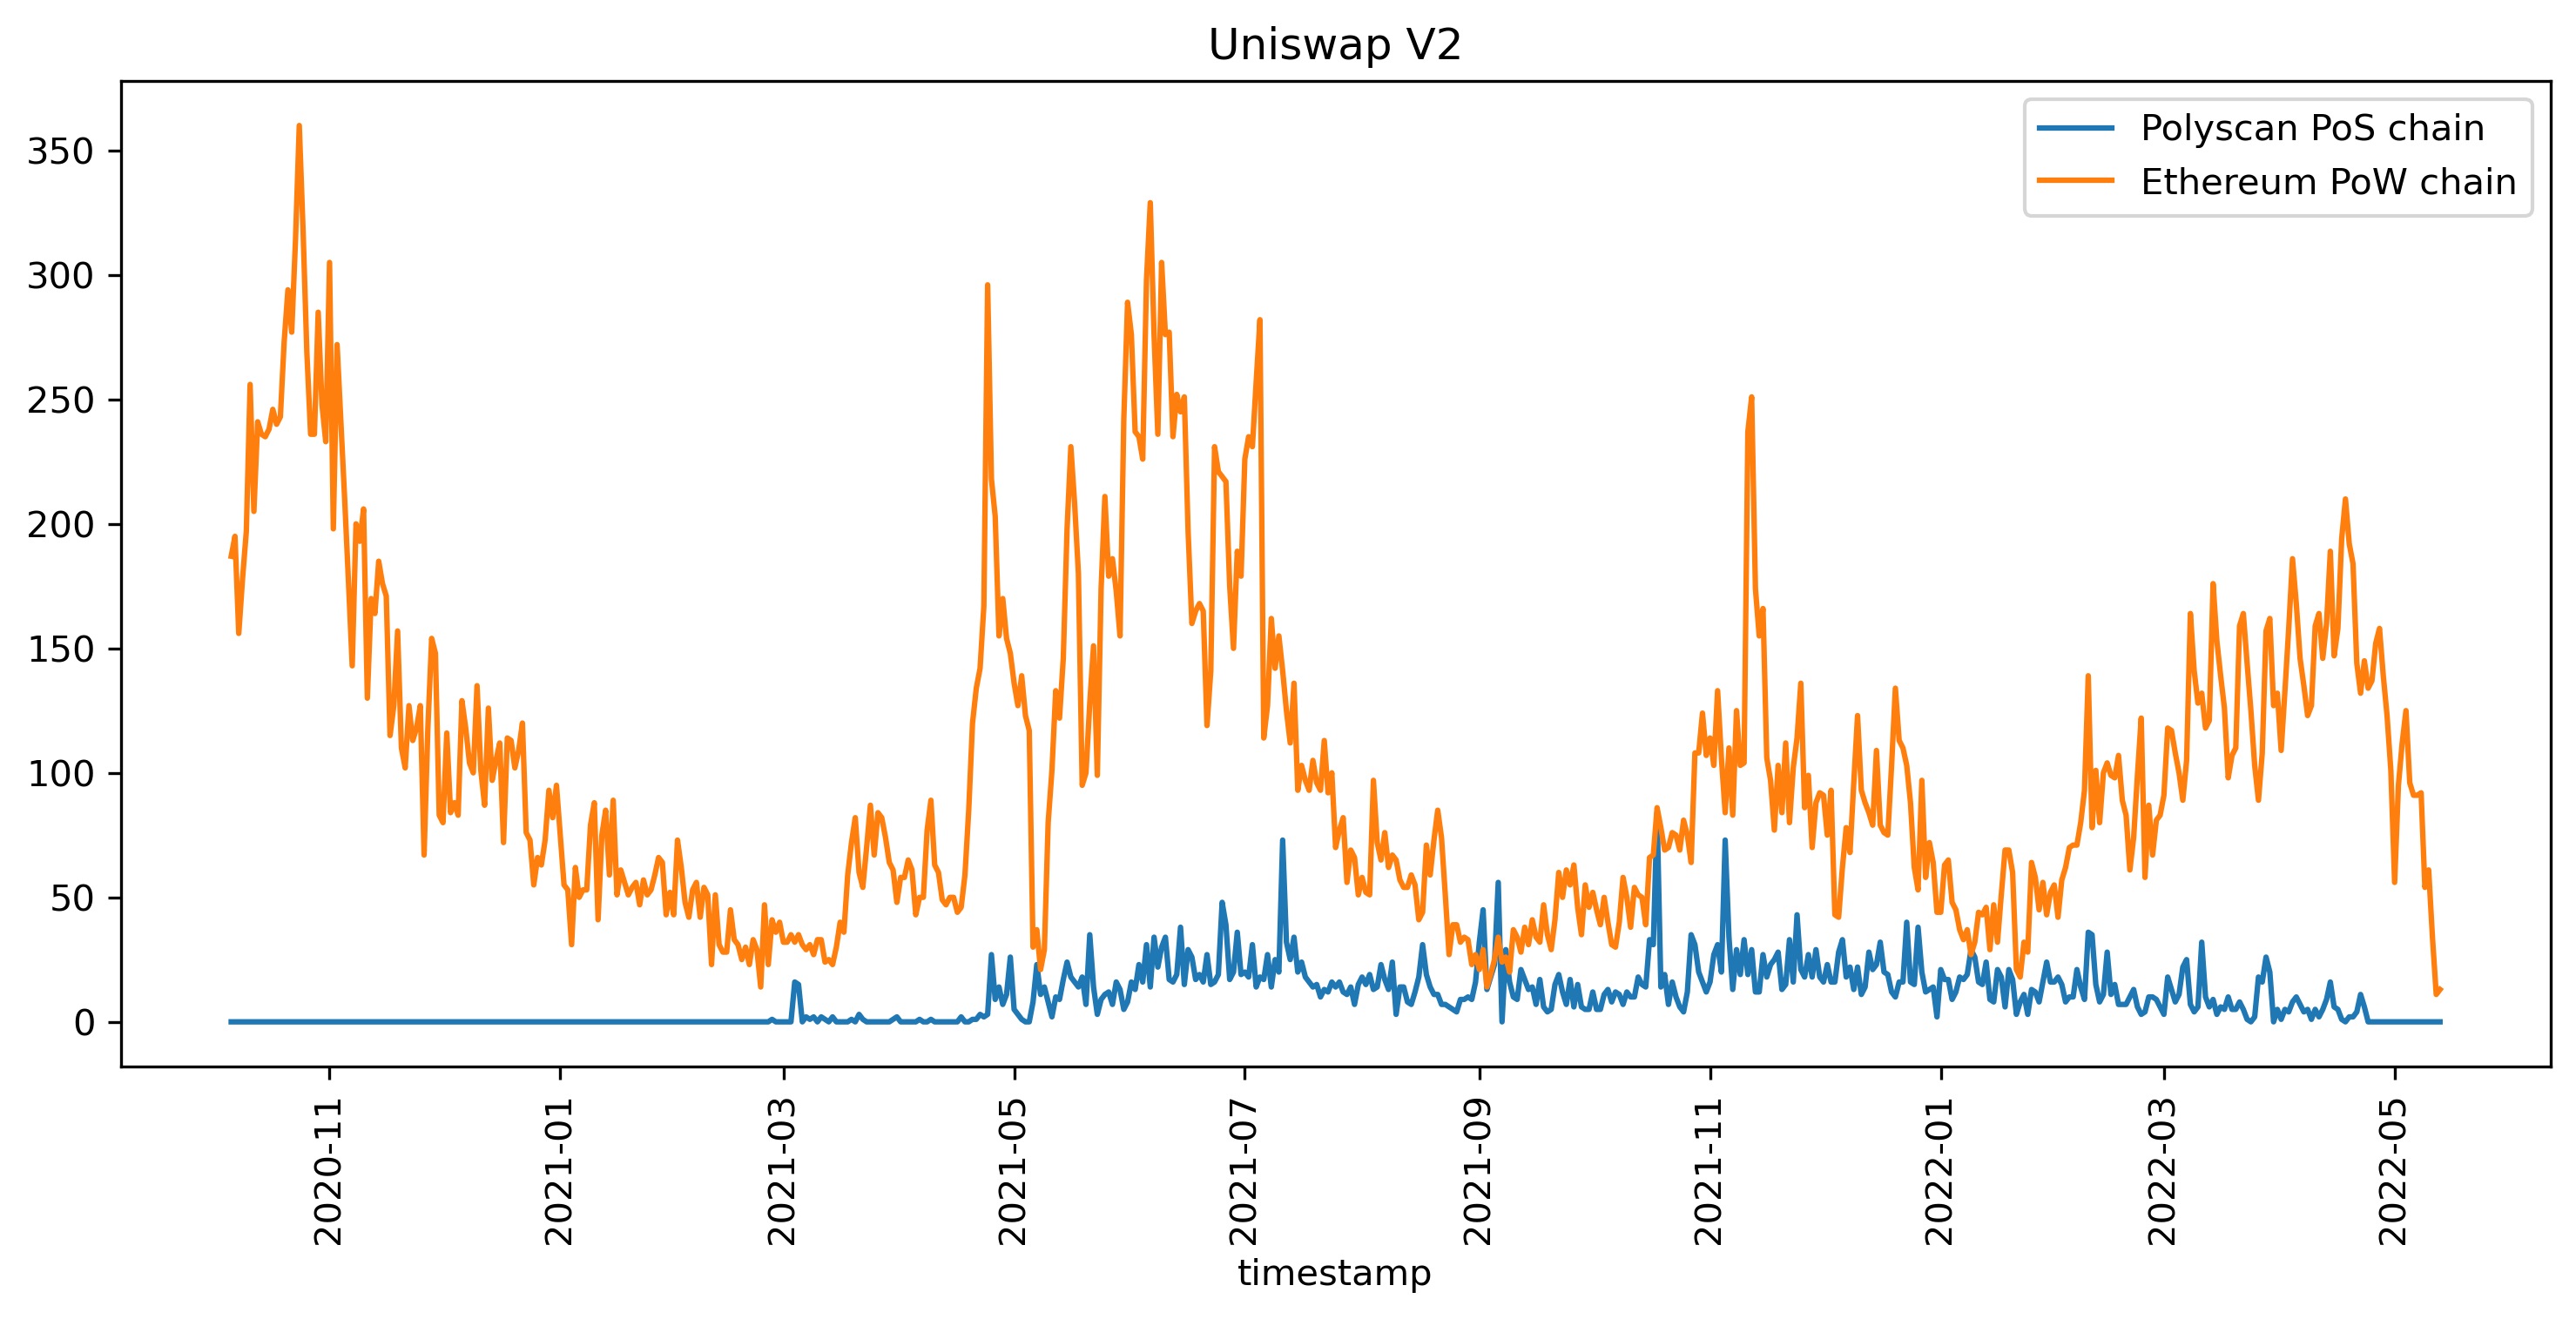

In [199]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

ether= pd.read_csv("data/uniswap_v2/etherscan_pools.csv")
polygon = pd.read_csv("data/uniswap_v2/polygonscan_pools.csv")

ether['timestamp']=pd.to_datetime(ether['timestamp'],unit='s')
polygon['timestamp']=pd.to_datetime(polygon['timestamp'],unit='s')

df = pd.concat([
    polygon['pair'].groupby(polygon['timestamp'].dt.date).count(),
    ether['pair'].groupby(ether['timestamp'].dt.date).count()], axis=1).fillna(0)
df.columns = ["Polyscan PoS chain","Ethereum PoW chain"]
#df.plot(rot=90, figsize = (12, 5))
df.plot(rot=90, figsize = (12, 5), title = "Uniswap V2").figure.savefig("uniswap_v2")

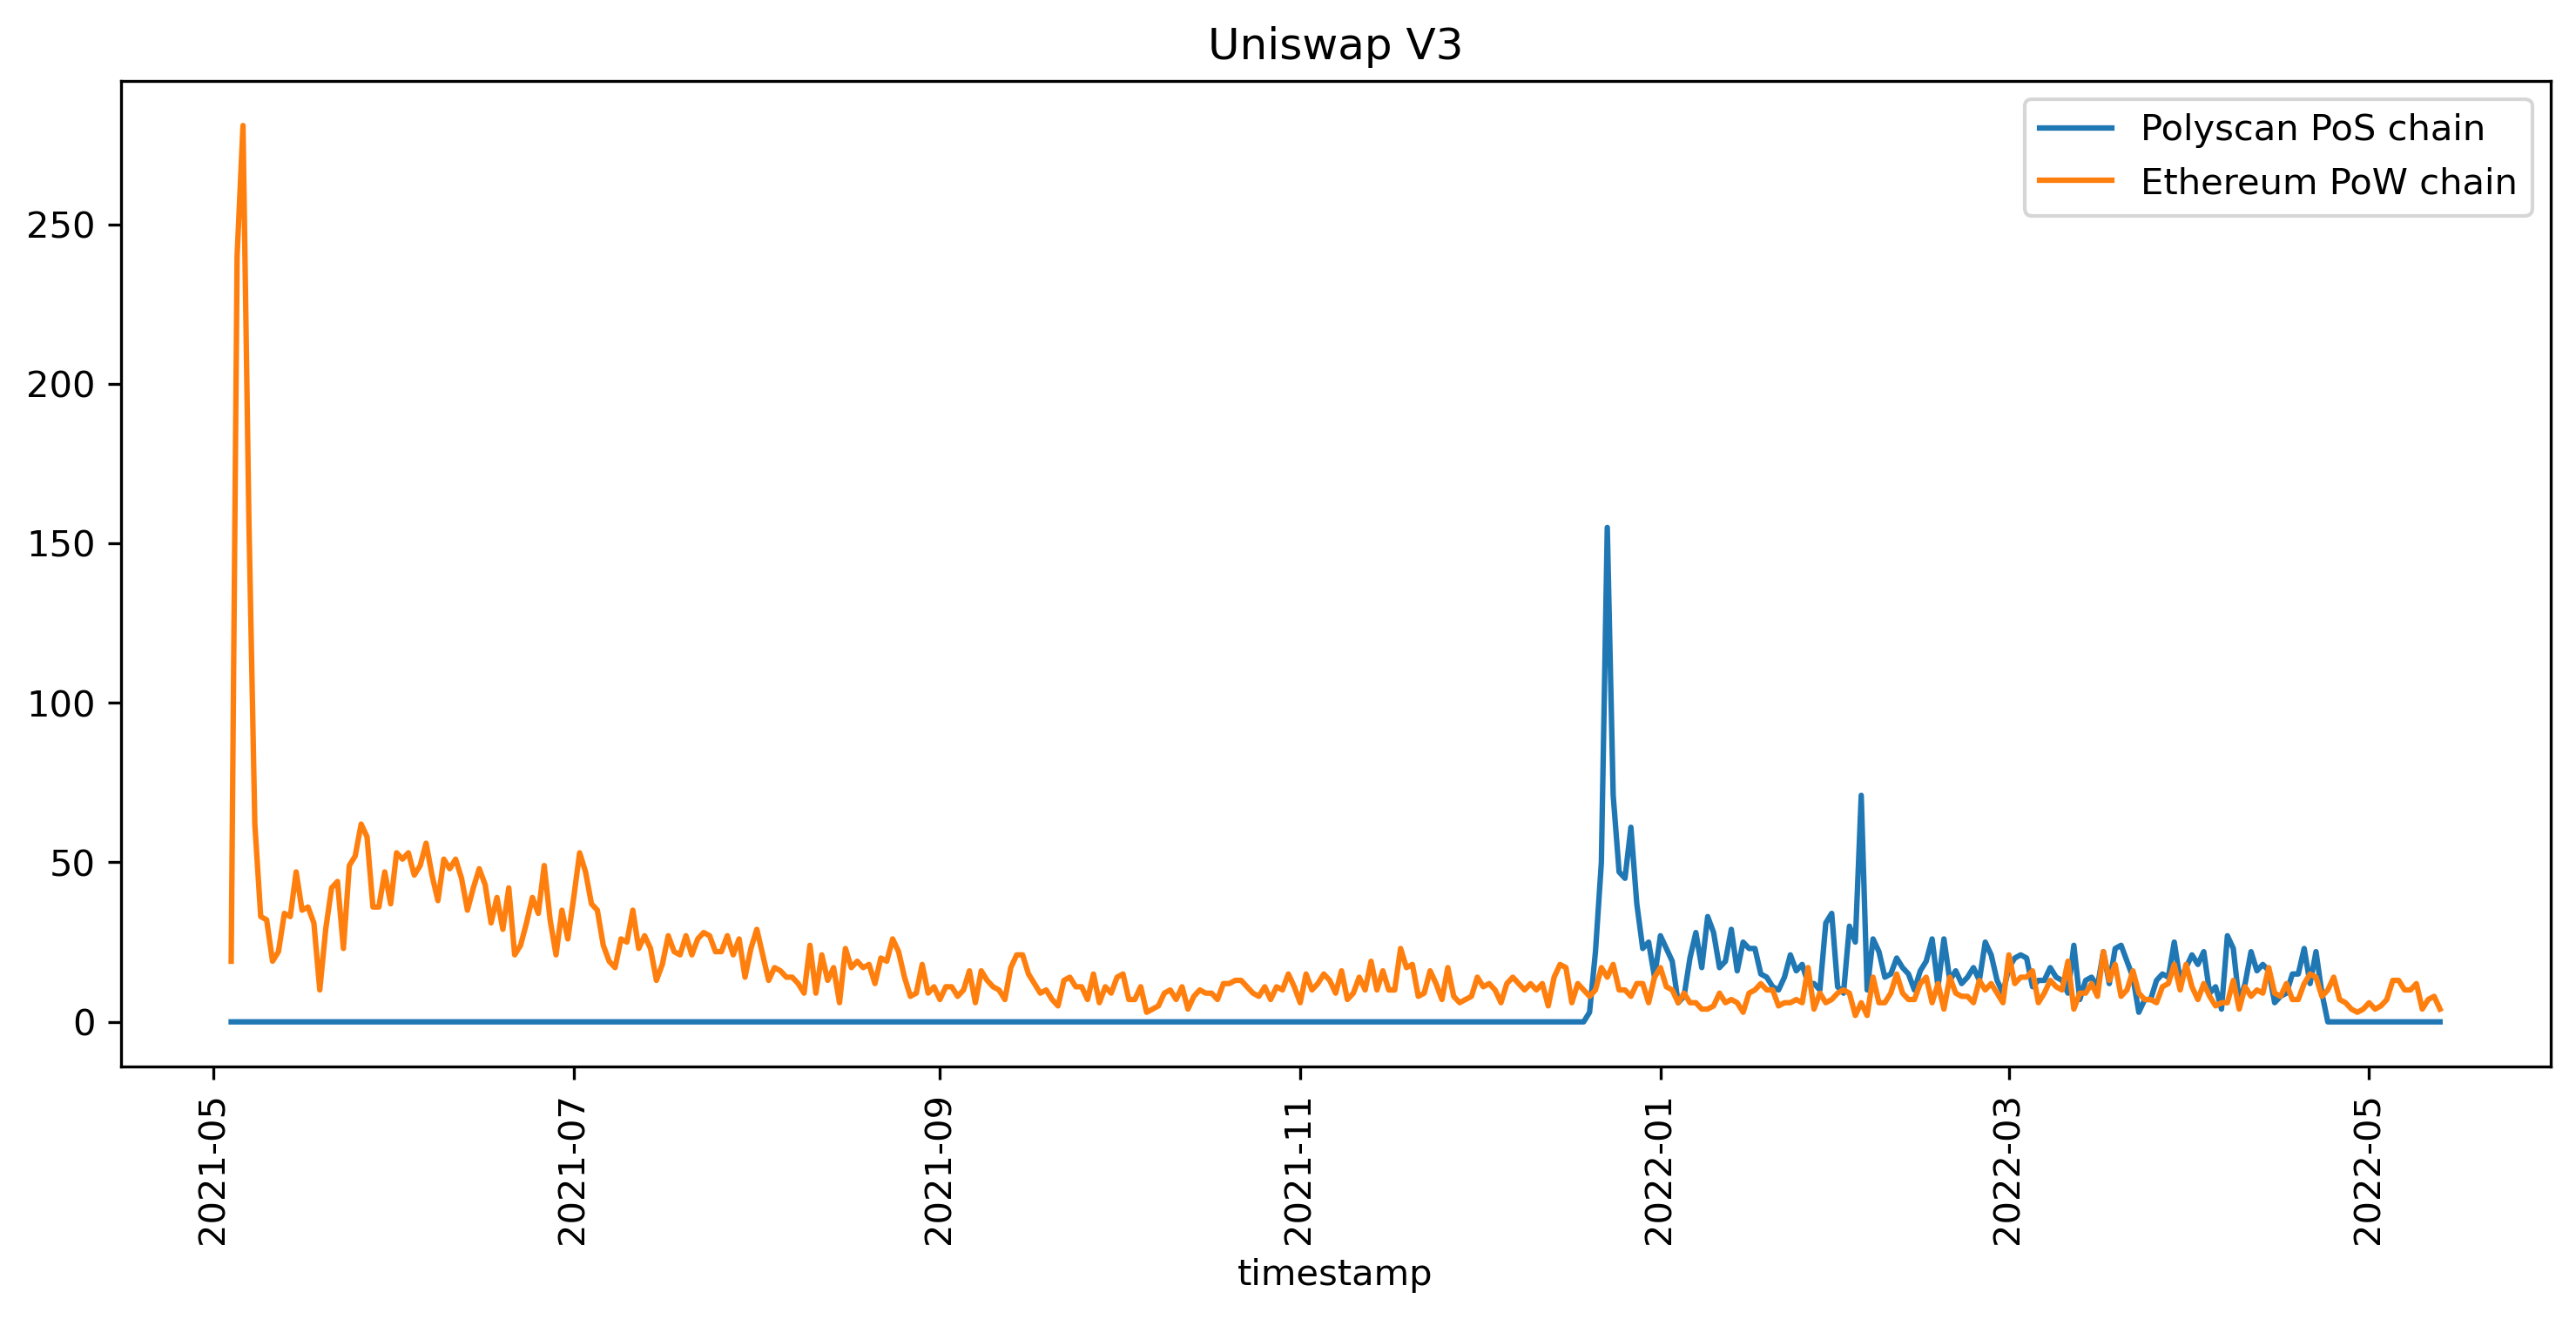

In [200]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

ether= pd.read_csv("data/uniswap_v3/etherscan_pools.csv")
polygon = pd.read_csv("data/uniswap_v3/polygonscan_pools.csv")

ether['timestamp']=pd.to_datetime(ether['timestamp'],unit='s')
polygon['timestamp']=pd.to_datetime(polygon['timestamp'],unit='s')

df = pd.concat([
    polygon['pair'].groupby(polygon['timestamp'].dt.date).count(),
    ether['pool'].groupby(ether['timestamp'].dt.date).count()], axis=1).fillna(0)
df.columns = ["Polyscan PoS chain","Ethereum PoW chain"]
df.plot(rot=90, figsize = (12, 5), title = "Uniswap V3").figure.savefig("uniswap_v3")

In [167]:
ether

,pool,token0,token1,block_number,timestamp
0,0x1d42064Fc4Beb5F8aAF85F4617AE8b3b5B8Bd801,0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,12369739,2021-05-04 19:52:36
1,0x6c6Bc977E13Df9b0de53b251522280BB72383700,0x6B175474E89094C44Da98b954EedeAC495271d0F,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,12369760,2021-05-04 19:58:13
2,0x7BeA39867e4169DBe237d55C8242a8f2fcDcc387,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,12369811,2021-05-04 20:07:45
3,0xCBCdF9626bC03E24f779434178A73a0B4bad62eD,0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,12369821,2021-05-04 20:09:34
4,0xC2e9F25Be6257c210d7Adf0D4Cd6E3E881ba25f8,0x6B175474E89094C44Da98b954EedeAC495271d0F,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,12369854,2021-05-04 20:16:08
...,...,...,...,...,...
6694,0x016d7096a73bf466f444f286E704D81D09BabEc2,0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599,0xCdF7028ceAB81fA0C6971208e83fa7872994beE5,14763482,2022-05-12 21:38:37
6695,0x59d8E2FD24b56A31eb6AC4b5bA749D120A7D1480,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0xa47c8bf37f92aBed4A126BDA807A7b7498661acD,14763568,2022-05-12 21:55:42
6696,0xdc785546d8ED7246f1De46e2dDb58176b5207b30,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xc383a3833A87009fD9597F8184979AF5eDFad019,14763692,2022-05-12 22:24:21
6697,0x9f733005f4B54dfA3991b94c7c227F10296fcA75,0x0337fe811809A0aaf9B5D07945b39E473dE4c46E,0x78a3B2f1e7eec1073088ea4a193618743F81cEf8,14765208,2022-05-13 04:18:01
